## Prueba #0401

### "Número óptimo de clústeres para agrupamiento con K-medias"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

#### Responde la siguiente pregunta proporcionando código Python:

In [3]:
# Usaremos datos simulados.
# 3 grupos en un espacio de 8 dimensiones.
# ¡Difícil de visualizar!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Defina una función que calcule la "suma interna total de cuadrados".
- X         :   Datos.
- centers   :   Matriz que contiene las coordenadas del centroide. Calculado por kmeans.
- clusters  :   Matriz de etiquetas de clústeres. Calculado por kmeans. <br> <br>
SUGERENCIA: Implemente la fórmula de la clase teórica.

In [4]:
kmeans = KMeans(n_clusters = 3, random_state=123) #Sabemos que tenemos tres clases por el dataset, normalmente no lo tendremos
kmeans.fit(X) #Le pasamos la información

KMeans(n_clusters=3, random_state=123)

In [5]:
kmeans.labels_

array([2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0])

In [20]:
kmeans.cluster_centers_

array([[ 3.90017709, -4.49107153, -5.42803149,  0.79601424,  4.29469615,
        -1.81457648,  9.51919598,  3.41269781],
       [-0.45058073, -1.95855821, -2.81289371,  4.64334117, -1.61152497,
        -8.70234723, -2.26657376,  4.98800128],
       [-6.09715151, -6.62338226,  0.64332419,  0.51743229,  2.50758482,
         6.98957767,  4.47094678,  1.79021736]])

In [6]:
X.shape

(150, 8)

In [16]:
def total_internal_ss2(X, centers, clusters):
    SSW = 0
    for label in np.unique(clusters):
        x_with_label = X[clusters == label] #Esta parte de aqui representaria 
        SSW += ((x_with_label - centers[label])**2).sum()
    return SSW
tss = total_internal_ss2(X, kmeans.cluster_centers_, kmeans.labels_)
print(tss)

4665.301322394901


2). Visualice como un diagrama de dispersión la "suma interna total de cuadrados" vs N# de grupos. 
- Luego, determine el número óptimo de clústeres.
- ¿Es este número el mismo que se esperaba?

Para entender como funcionaba, primero realice un Método Elbow más puro sacando el kmeans.inertia_ que es en realidad la formula de la suma interna total de cuadrados.

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


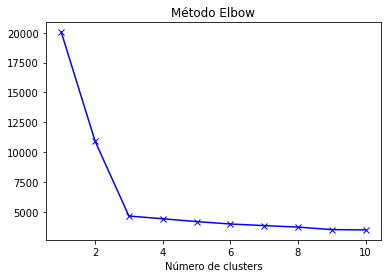

In [74]:
distortions = []
for k in range(1,11):
    kmeanModel = KMeans(n_clusters=k, random_state=123)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Número de clusters')
plt.title('Método Elbow')
plt.show()

Sabiendo que el código funciona correctamente, sería cambiar el inertia por nuestra función, y así comprobamos que esta bien realizada, además ambas gráficas están de acuerdo en que la optimización está en 3 clusters.

D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


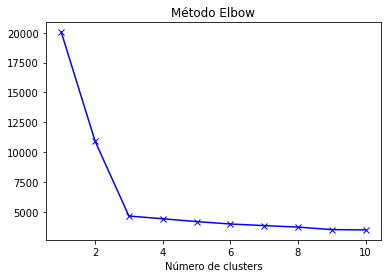

In [18]:
distortions = []
for k in range(1,11):
    kmeanModel = KMeans(n_clusters=k, random_state=123)
    kmeanModel.fit(X)
    distortions.append(total_internal_ss2(X, kmeanModel.cluster_centers_, kmeanModel.labels_))
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Número de clusters')
plt.title('Método Elbow')
plt.show()

### A continuación muestro el proceso para llegar al código deseado
Primero de todo necesitamos calcular SSW (Suma interna total de cuadrados)

La formula es la siguiente:
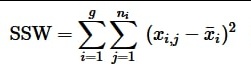

Si traducimos literalmente la formula a codigo obtenemos

In [15]:
def total_internal_ss2(X, centers, clusters):
    SSW = 0
    for label in np.unique(clusters):
        x_with_label = X[clusters == label] #Esta parte de aqui representaria 
        SSW += ((x_with_label - centers[label])**2).sum()
    return SSW
tss = total_internal_ss2(X, kmeans.cluster_centers_, kmeans.labels_)
print(tss)

4665.301322394901


#### Pruebas con SSW

Esto es para intentar mostrarlo

In [77]:
def total_internal_ss(X, centers, clusters):
    SSW = []
    SSW_t = np.empty([0, 8])
    for label in np.unique(clusters):
        x_with_label = X[clusters == label]
        SSW = ((x_with_label - centers[label])**2)
        SSW_t = np.concatenate((SSW_t,SSW))
        print(SSW_t.shape)
    return SSW_t

tss = total_internal_ss(X, kmeans.cluster_centers_, kmeans.labels_)
print(tss)
print(X)

(50, 8)
(100, 8)
(150, 8)
[[7.02672260e+00 1.81955435e+00 5.94217422e+00 ... 3.22340260e+00
  4.20405849e+00 8.86304657e+00]
 [2.07125510e+00 7.41272201e+00 4.58044579e+00 ... 1.56441498e+01
  2.87455292e+01 5.31902862e+00]
 [1.32463707e+01 1.77370367e-01 4.06975195e+00 ... 1.36448993e-02
  6.02340305e+00 3.35089178e-03]
 ...
 [2.73534974e+00 1.47219037e+00 8.34948482e-01 ... 3.69939270e+00
  2.00728378e+00 8.59829869e-01]
 [2.40592797e+00 7.40969631e-01 1.28334829e+00 ... 1.86014979e-01
  2.40490254e+00 2.96291745e-01]
 [2.11334803e+00 2.92731433e+01 7.08819253e-03 ... 1.18835032e+01
  8.99427037e-01 8.56687546e+00]]
[[ -8.57489393  -8.9993319    2.55044022 ...   9.34474989   4.69204028
    1.37710201]
 [ -3.10137732  -0.60964963  -5.25055123 ... -10.49773092  -0.21619367
    2.01091436]
 [  3.25936219  -2.21498438  -7.63210675 ...  -2.29622367  10.89939335
   -0.25918109]
 ...
 [ -2.35140914  -1.14627793  -2.64047991 ...  -9.27345005   0.62214666
    5.19270125]
 [  1.36856269  -1.45

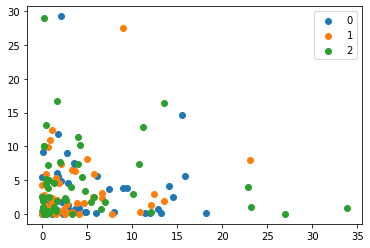

In [56]:
u_labels = np.unique(kmeans.labels_)
centroids = kmeans.cluster_centers_

for i in u_labels:
    plt.scatter(tss[label == i , 0] , tss[label == i , 1] , label = i)
    
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'black') #Siendo s el tamaño del punto
plt.legend()
plt.show()

#### Prueba con STC

In [57]:
def total_internal_ss(X, centers, clusters):
    xm = np.mean(X)
    STC = 0
    for i in X: #Representación del sumatorio
        STC += ((i-xm)**2) #Representacion de los parentesis, siendo xm la media de X y elevandolo al cuadrado
    return STC

tss = total_internal_ss(X, kmeans.cluster_centers_, kmeans.labels_)
tss

array([3358.54444031, 4299.66791036, 2657.06879572, 1467.22816281,
       1904.82054849, 7123.90063775, 5999.42235675, 2343.97682596])

#### Intento de visualizaciones


Este es el dataset mostrado sin ver a que clase pertenece cada uno

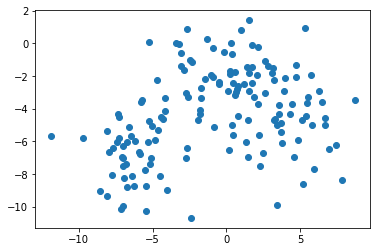

In [11]:
X_P, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
plt.figure()
plt.scatter(X_P[:,0], X_P[:,1])

Este es el dataset mostrando a que clase pertenece cada uno sin realizar aun el fit del kmeans

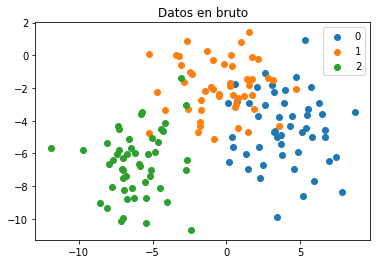

In [12]:
for i in np.unique(label):
    plt.scatter(X_P[label == i , 0] , X_P[label == i , 1] , label = i)
    
plt.title('Datos en bruto')
plt.legend()
plt.show()

Este es el dataset después de hacer el fit de kmeans

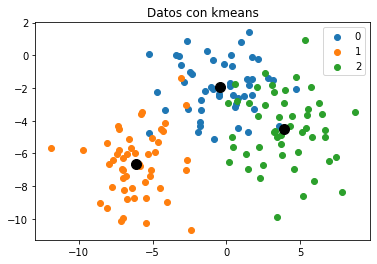

In [15]:
kmeans = KMeans(n_clusters = 3, random_state=123) #Sabemos que tenemos tres clases por el dataset, normalmente no lo tendremos
kmeans.fit(X_P) #Le pasamos la información

u_labels = np.unique(kmeans.labels_)
centroids = kmeans.cluster_centers_
label2 = kmeans.predict(X_P)

for i in u_labels:
    plt.scatter(X_P[label2 == i , 0] , X_P[label2 == i , 1] , label = i)
    
plt.title('Datos con kmeans')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'black') #Siendo s el tamaño del punto 
plt.legend()
plt.show()

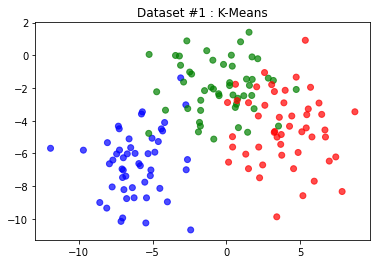

In [14]:
# Dataset #1 and three clusters.
kmeans = KMeans(n_clusters=3,random_state=123)                 # objeto kmeans para 3 clústeres. radom_state = 123 significa inicialización determinista.
kmeans.fit(X_P)                                                 # Aprendizaje no supervisado => Solo X1.
myColors = {0:'red',1:'green', 2:'blue'}  
plt.scatter(X_P[:,0],X_P[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 ) 
plt.title('Dataset #1 : K-Means')
plt.show()